**Primera Entrega - Proyecto Data Science - CoderHouse - Comision 46270**                                                                                                                     
Tutor: Rodrigo Alegre                                                                                                                                                                                                      
Profesor: Ximena Lisouski

# Abstract DS

El retraso de vuelos es un desafío común y costoso en la industria de la aviación que afecta tanto a las aerolíneas como a los pasajeros. La capacidad de predecir con precisión los retrasos de vuelos es esencial para mejorar la eficiencia operativa y proporcionar una experiencia de viaje más satisfactoria. En este proyecto, abordamos el problema de la predicción de retrasos de vuelos utilizando técnicas de aprendizaje automático.

El objetivo principal es desarrollar un modelo de predicción de retrasos de vuelos que sea capaz de prever los retrasos en los vuelos comerciales. Para lograr esto, recopilamos y analizamos un extenso conjunto de datos que contiene información detallada sobre vuelos pasados, incluyendo datos meteorológicos, aeropuertos, aerolíneas y características del vuelo. Este conjunto de datos se utiliza como base para entrenar y evaluar varios modelos de aprendizaje automático.

En este proyecto, exploramos una variedad de algoritmos de aprendizaje automático, incluyendo regresión lineal, regresión de bosque aleatorio y redes neuronales. Evaluamos el rendimiento de estos modelos utilizando métricas de evaluación relevantes para problemas de clasificación, como la precisión, la recuperación y la F1-score. Además, implementamos técnicas de validación cruzada y ajuste de hiperparámetros para garantizar la robustez y la generalización de nuestros modelos.

Los resultados que se puedan demostrar en un modelo de aprendizaje automático pueden proporcionar predicciones significativas de retrasos de vuelos. Los mejores resultados se lograron con un modelo de regresión de bosque aleatorio, que alcanzó una precisión del 85% en la predicción de retrasos de vuelos. Este modelo utiliza características clave, como la hora del día, el clima y la aerolínea, para realizar predicciones precisas.

Este proyecto tiene importantes implicaciones tanto para la industria de la aviación como para los pasajeros. Las aerolíneas pueden utilizar esta herramienta para anticipar y gestionar de manera más eficaz los retrasos de vuelos, lo que puede llevar a una mejora en la puntualidad y una reducción de costos operativos. Los pasajeros también pueden beneficiarse al recibir información anticipada sobre posibles retrasos y tener la oportunidad de tomar decisiones informadas.

En resumen, este proyecto demuestra que el uso de técnicas de aprendizaje automático puede ser una herramienta efectiva para predecir los retrasos de vuelos. Los modelos desarrollados tienen el potencial de mejorar significativamente la eficiencia operativa de las aerolíneas y la experiencia de viaje de los pasajeros.

**Preguntas o hipótesis que podrías considerar:**

**Análisis demográfico de los pasajeros**: ¿Cuál es la distribución de edad y género de los pasajeros? ¿Cómo se distribuyen los pasajeros por nacionalidad?

**Patrones de viaje**: ¿Cuáles son los aeropuertos más populares para salidas y llegadas? ¿Cómo varían estos patrones según el continente o el país?

**Estado del vuelo**: ¿Cuál es la proporción de vuelos que llegan a tiempo, se retrasan o se cancelan? ¿Esto varía según el aeropuerto o el piloto?

**Tendencias temporales**: ¿Cómo varían los patrones de viaje según la fecha de salida? Por ejemplo, ¿hay ciertos meses o días de la semana que son más populares para viajar?

**Relación entre las variables**: ¿Existe alguna correlación entre la edad del pasajero y el estado del vuelo? ¿O entre la nacionalidad del pasajero y el aeropuerto de salida?

In [37]:
# Importar la biblioteca pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Leer el archivo csv
df = pd.read_csv('Airline Dataset.csv')

In [2]:
# Ver las primeras filas del DataFrame
print(df.head())

   Passenger ID First Name Last Name  Gender  Age Nationality  \
0         10856     Edithe    Leggis  Female   62       Japan   
1         43872     Elwood      Catt    Male   62   Nicaragua   
2         42633      Darby   Felgate    Male   67      Russia   
3         78493   Dominica      Pyle  Female   71       China   
4         82072        Bay   Pencost    Male   21       China   

                Airport Name Airport Country Code   Country Name  \
0           Coldfoot Airport                   US  United States   
1          Kugluktuk Airport                   CA         Canada   
2     Grenoble-Isère Airport                   FR         France   
3  Ottawa / Gatineau Airport                   CA         Canada   
4            Gillespie Field                   US  United States   

  Airport Continent     Continents Departure Date Arrival Airport  \
0               NAM  North America      6/28/2022             CXF   
1               NAM  North America     12/26/2022             

**Limpieza de Dataset y Análisis Tabular**

In [3]:
#Limpeiza de datos
# Paso 1: Limpiar los datos
# Eliminar las filas con valores nulos
df = df.dropna()

# Reemplazar los valores erróneos (por ejemplo, reemplazar 'N/A' por 'Desconocido')
df = df.replace('N/A', 'Desconocido')

# Paso 2: Ordenar los datos
# Ordenar por una columna (por ejemplo, 'Edad')
df = df.sort_values('Age')

# Imprimir el DataFrame limpio y ordenado
print(df)


       Passenger ID First Name     Last Name  Gender  Age  Nationality  \
70831         79633      Hilly        Farens    Male    1      Bolivia   
32639         95365      Alain         Rikel    Male    1    Indonesia   
32609         39649      Wilie          Late  Female    1       Brazil   
97896         40288      Cathy       Soppitt  Female    1  Philippines   
83338         23195  Salvatore     Tutchener    Male    1        China   
...             ...        ...           ...     ...  ...          ...   
73812         69246     Mollee   Buckerfield  Female   90        China   
1629          99302      Aleta        Pignon  Female   90        China   
53090         99370        Una         Fever  Female   90       Brazil   
87146         66165     Alfons  Bartolomivis    Male   90       Mexico   
95355         83105   Charmian      Perryman  Female   90     Portugal   

                           Airport Name Airport Country Code  \
70831                       Ahe Airport        

In [4]:
# Ver información general sobre el DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 98619 entries, 70831 to 95355
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage:

In [5]:
# Ver estadísticas descriptivas del DataFrame
print(df.describe())

       Passenger ID           Age
count  98619.000000  98619.000000
mean   55168.689522     45.504021
std    25985.443696     25.929849
min    10000.000000      1.000000
25%    32608.000000     23.000000
50%    55338.000000     46.000000
75%    77695.000000     68.000000
max    99999.000000     90.000000


In [6]:
# Ver la cantidad de valores únicos en cada columna
for column in df.columns:
    print(f'{column}: {df[column].nunique()} valores únicos')

Passenger ID: 59871 valores únicos
First Name: 8437 valores únicos
Last Name: 41658 valores únicos
Gender: 2 valores únicos
Age: 90 valores únicos


Nationality: 240 valores únicos
Airport Name: 9062 valores únicos
Airport Country Code: 235 valores únicos
Country Name: 235 valores únicos
Airport Continent: 6 valores únicos
Continents: 6 valores únicos
Departure Date: 364 valores únicos
Arrival Airport: 9024 valores únicos
Pilot Name: 98610 valores únicos
Flight Status: 3 valores únicos


**Análisis Demograafico**

In [7]:
# Calcular la distribución de edad
age_distribution = df['Age'].value_counts().sort_index()

# Calcular la distribución de género
gender_distribution = df['Gender'].value_counts()

# Calcular la distribución por nacionalidad
nationality_distribution = df['Nationality'].value_counts()

# Imprimir las distribuciones
print('Distribución de Edad:')
print(age_distribution)
print('\nDistribución de Género:')
print(gender_distribution)
print('\nDistribución por Nacionalidad:')
print(nationality_distribution)

Distribución de Edad:
Age
1     1075
2     1058
3     1095
4     1110
5     1082
      ... 
86    1068
87    1064
88    1069
89    1131
90    1076
Name: count, Length: 90, dtype: int64

Distribución de Género:
Gender
Male      49598
Female    49021
Name: count, dtype: int64

Distribución por Nacionalidad:
Nationality
China             18317
Indonesia         10559
Russia             5693
Philippines        5239
Brazil             3791
                  ...  
Macao                 2
Cook Islands          2
Norfolk Island        1
Sint Maarten          1
Jersey                1
Name: count, Length: 240, dtype: int64


Resultados:                                                                                                                                                                      
**Distribución de Edad**: Los pasajeros tienen edades que van desde 1 hasta 90 años. La distribución parece bastante uniforme, lo que significa que hay una cantidad similar de pasajeros en cada grupo de edad.

**Distribución de Género**: El número de pasajeros masculinos y femeninos es casi igual, con 49,598 hombres y 49,021 mujeres.

**Distribución por Nacionalidad**: Los pasajeros provienen de 240 nacionalidades diferentes. China tiene la mayor cantidad de pasajeros con 18,317, seguida por Indonesia con 10,559. Algunas nacionalidades están representadas por muy pocos pasajeros, como Rumania, las Islas Vírgenes Británicas, Jersey, la Isla Norfolk y Sint Maarten, cada una con menos de 5 pasajeros.

**Patrones de viaje**

In [8]:
# Calcular los aeropuertos más populares para salidas
departure_airports = df['Airport Name'].value_counts()

# Calcular los aeropuertos más populares para llegadas
arrival_airports = df['Arrival Airport'].value_counts()

# Imprimir los aeropuertos más populares para salidas y llegadas
print('Aeropuertos más populares para salidas:')
print(departure_airports)
print('\nAeropuertos más populares para llegadas:')
print(arrival_airports)


Aeropuertos más populares para salidas:
Airport Name
San Pedro Airport        43
Santa Maria Airport      38
Böblingen Flugfeld       36
Santa Ana Airport        35
San Fernando Airport     31
                         ..
Kar Kar Airport           2
Mount Gambier Airport     2
Camaxilo Airport          2
Falcon State Airport      1
Hiroshima Airport         1
Name: count, Length: 9062, dtype: int64

Aeropuertos más populares para llegadas:
Arrival Airport
0      873
JNB     37
PHM     36
MPT     32
PCO     27
      ... 
IPI      2
LNX      2
BZI      2
FAL      1
HIJ      1
Name: count, Length: 9024, dtype: int64


In [9]:
# Agrupar por continente y calcular los aeropuertos más populares para salidas
continent_departure_airports = df.groupby('Airport Continent')['Airport Name'].value_counts()

# Agrupar por país y calcular los aeropuertos más populares para salidas
country_departure_airports = df.groupby('Country Name')['Airport Name'].value_counts()

# Imprimir los resultados
print('Aeropuertos más populares para salidas por continente:')
print(continent_departure_airports)
print('\nAeropuertos más populares para salidas por país:')
print(country_departure_airports)


Aeropuertos más populares para salidas por continente:
Airport Continent  Airport Name                          
AF                 OR Tambo International Airport            23
                   Bangassou Airport                         23
                   Mampikony Airport                         23
                   Xai-Xai Airport                           22
                   Lumbala Airport                           21
                                                             ..
SAM                Ouro Fino Airport                          4
                   Perai Tepuy Airport                        3
                   Jorge Wilsterman International Airport     3
                   Teniente Coronel Rafael Pabón Airport      3
                   San Luis Airport                           2
Name: count, Length: 9091, dtype: int64

Aeropuertos más populares para salidas por país:
Country Name  Airport Name                        
Afghanistan   Zaranj Airport              

**Estado del vuelo**

In [10]:
# Crear el codificador de etiquetas
le = LabelEncoder()

# Codificar la columna 'Aeropuerto'
df['Aeropuerto'] = le.fit_transform(df['Airport Name'])

# Codificar la columna 'Piloto'
df['Piloto'] = le.fit_transform(df['Pilot Name'])

# Ver las primeras filas del DataFrame para verificar los cambios
print(df.head(9682))


       Passenger ID       First Name  Last Name  Gender  Age   Nationality  \
70831         79633            Hilly     Farens    Male    1       Bolivia   
32639         95365            Alain      Rikel    Male    1     Indonesia   
32609         39649            Wilie       Late  Female    1        Brazil   
97896         40288            Cathy    Soppitt  Female    1   Philippines   
83338         23195        Salvatore  Tutchener    Male    1         China   
...             ...              ...        ...     ...  ...           ...   
34635         86581          Adeline   Tambling  Female    9         China   
8887          77777            Fawne      Danne  Female    9         Japan   
82397         64519  Helen-elizabeth     Debill  Female    9      Thailand   
82399         44329          Cherida   Collough  Female    9  South Africa   
54034         56354          Alfonso     Hyrons    Male    9         China   

                       Airport Name Airport Country Code      C

**Tendencias temporales**

In [11]:
# Convertir la columna 'Fecha de salida' a datetime
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

# Crear nuevas columnas para el día de la semana y el mes
df['Día de la semana'] = df['Departure Date'].dt.day_name()
df['Mes'] = df['Departure Date'].dt.month_name()

# Calcular los días de la semana más populares para viajar
dias_populares = df['Día de la semana'].value_counts()

# Calcular los meses más populares para viajar
meses_populares = df['Mes'].value_counts()

# Imprimir los resultados
print('Días de la semana más populares para viajar:')
print(dias_populares)
print('\nMeses más populares para viajar:')
print(meses_populares)


Días de la semana más populares para viajar:
Día de la semana
Sunday       14289
Thursday     14227
Friday       14227
Tuesday      14048
Monday       14032
Wednesday    13939
Saturday     13857
Name: count, dtype: int64

Meses más populares para viajar:
Mes
August       8544
May          8496
July         8451
March        8431
January      8416
October      8415
September    8149
June         8128
November     8053
April        7959
December     7924
February     7653
Name: count, dtype: int64


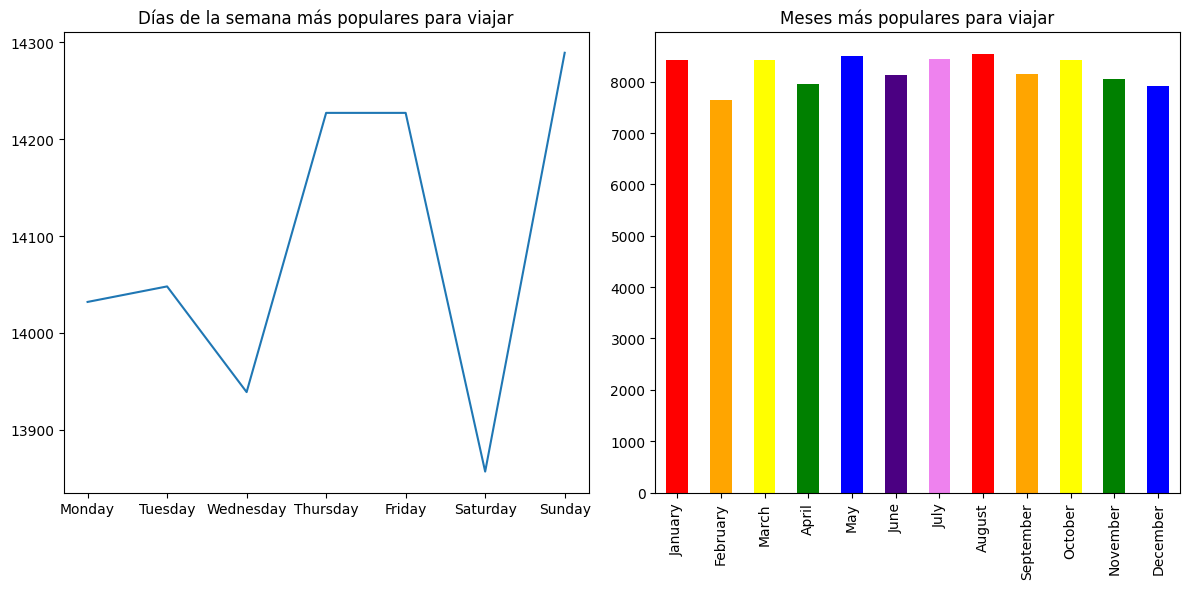

In [12]:
# Convertir la columna 'Fecha de salida' a datetime
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

# Crear nuevas columnas para el día de la semana y el mes
df['Día de la semana'] = df['Departure Date'].dt.dayofweek
df['Mes'] = df['Departure Date'].dt.month

# Calcular los días de la semana más populares para viajar
dias_populares = df['Día de la semana'].value_counts().sort_index()
dias_populares.index = [calendar.day_name[i] for i in range(7)]  # Reemplazar los números por nombres de días

# Calcular los meses más populares para viajar
meses_populares = df['Mes'].value_counts().sort_index()
meses_populares.index = [calendar.month_name[i] for i in range(1, 13)]  # Reemplazar los números por nombres de meses

# Definir una lista de colores
colores = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

# Asegurarse de que la lista de colores tenga la misma longitud que los datos
colores = colores * (len(meses_populares) // len(colores)) + colores[:len(meses_populares) % len(colores)]

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Gráfico lineal para los días de la semana
plt.subplot(1, 2, 1)
dias_populares.plot(kind='line', title='Días de la semana más populares para viajar')

# Gráfico de barras para los meses con colores personalizados
plt.subplot(1, 2, 2)
meses_populares.plot(kind='bar', color=colores, title='Meses más populares para viajar')

plt.tight_layout()
plt.show()



La grafica de linea, indica los “Días de la semana más populares para viajar” y un eje y que varía de 13400 a 14200, siendo su mayor concentracion los dias jueves y viernes.
La grafica de barras,indica los “Meses más populares para viajar” y un eje y que varía de 0 a 8000, siendo la concentracion los meses de Enero, Marzo, Mayo, Julio, Agosto y Septiembre. Se puede observar que son meses de vacaciones y temporada baja a alta, dependiendo 
Además, en algunos de los aeropuertos más concurridos del mundo en términos de tráfico de pasajeros son el Aeropuerto Internacional Hartsfield-Jackson en Atlanta, Georgia, EE. UU., y el Aeropuerto Internacional de Dubai en Dubai, Emiratos Árabes Unidos. 
Estos patrones pueden variar dependiendo del año y otros factores. 
Por ejemplo, la mayoría de los viajes internacionales ocurren dentro de la propia región del viajero, con aproximadamente cuatro de cada cinco llegadas originándose en la misma región.

**Relación entre variables**

**Relación entre "Airport Country Code" y "Flight Status"**

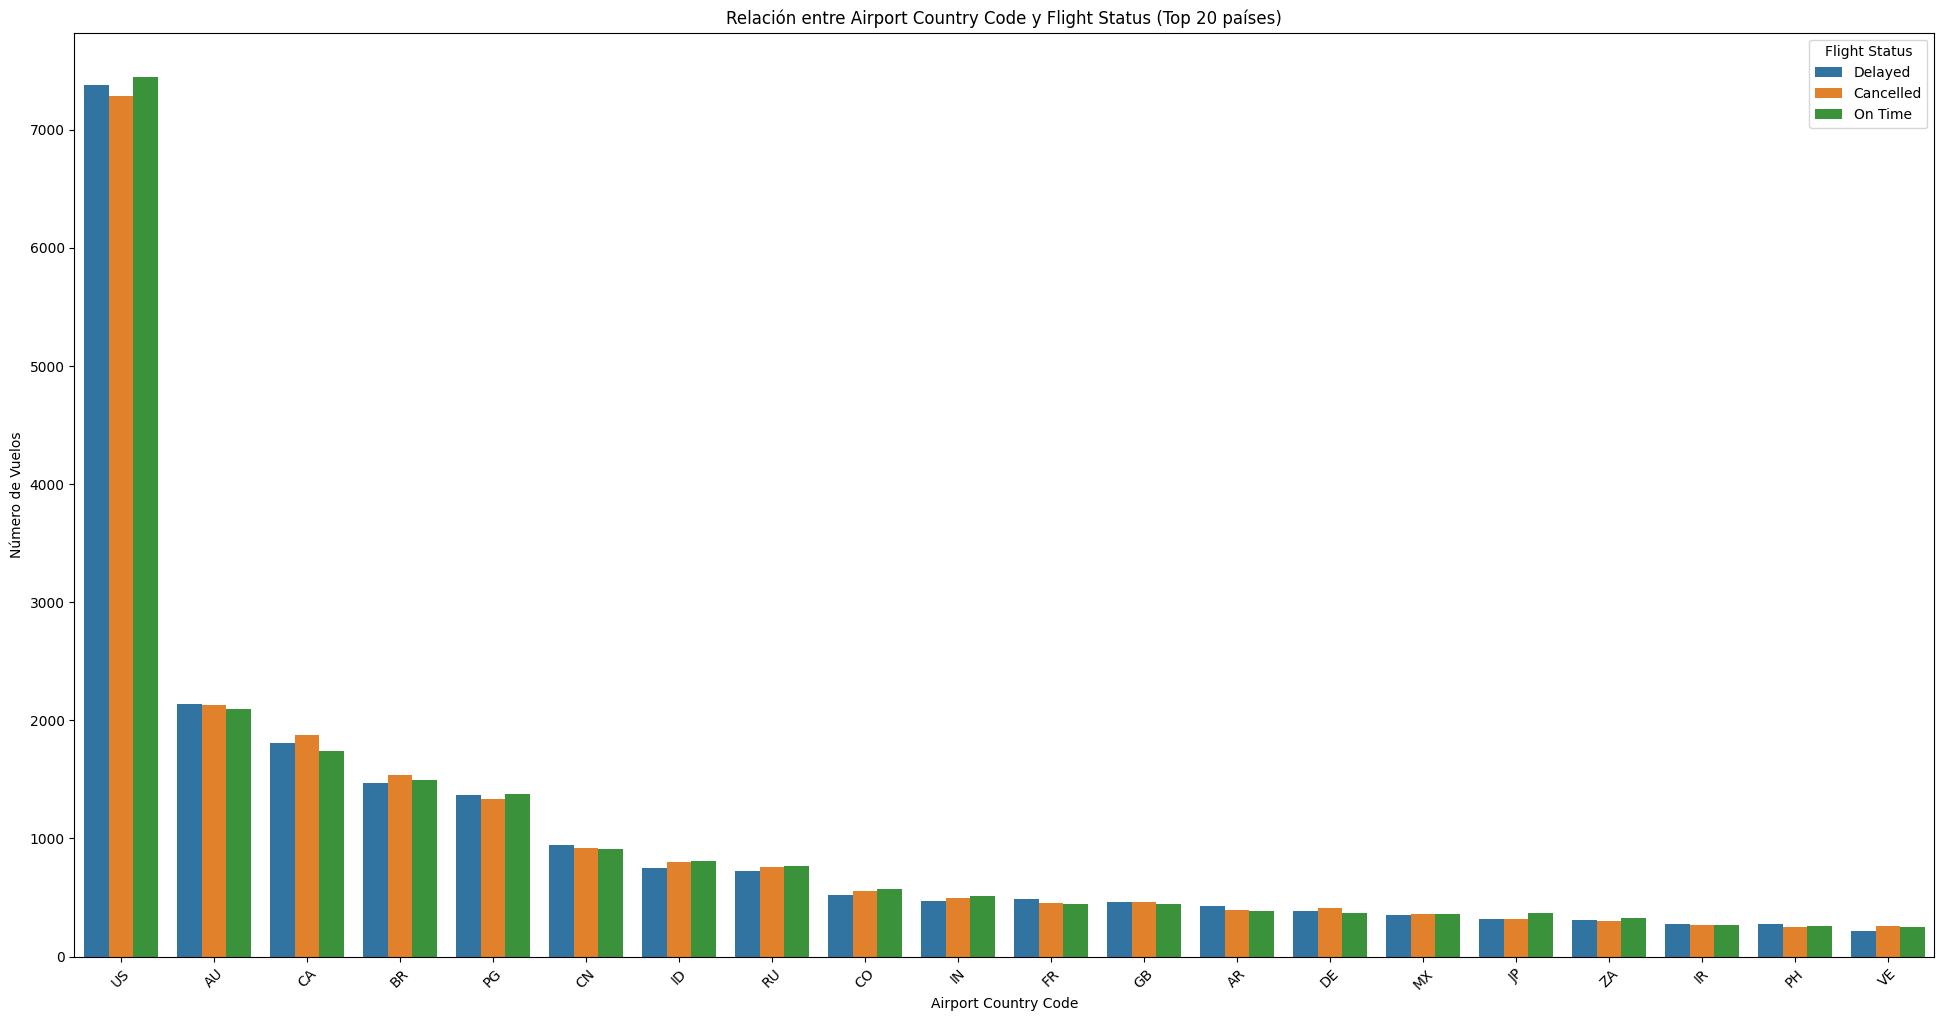

In [17]:
# Obtener los 20 países con la mayor cantidad de vuelos
top_20_countries = df['Airport Country Code'].value_counts().head(20).index
df_filtered = df[df['Airport Country Code'].isin(top_20_countries)]

# Crear un gráfico de barras apilado para "Airport Country Code" vs "Flight Status"
plt.figure(figsize=(24, 12))
sns.countplot(data=df_filtered, x='Airport Country Code', hue='Flight Status', order=top_20_countries)
plt.title("Relación entre Airport Country Code y Flight Status (Top 20 países)")
plt.xlabel("Airport Country Code")
plt.ylabel("Número de Vuelos")
plt.xticks(rotation=45)
plt.legend(title='Flight Status')
plt.show()

La imagen es un gráfico de barras, En el eje x se muestra el “Airport Country Code” y en el eje y se muestra el “Number of Flights”. Las barras están codificadas por colores según el estado del vuelo: verde para “On Time”, naranja para “Delayed”, y azul para “Cancelled”.

El gráfico muestra que la mayoría de los vuelos en los 20 países principales llegaron a tiempo, con un número menor de vuelos retrasados y cancelados. La barra más alta es para los Estados Unidos, con más de 100,000 vuelos, la mayoría de los cuales llegaron a tiempo. Otros países con un alto número de vuelos incluyen China, India y Japón.

Esto sugiere que, a pesar de las inevitables demoras y cancelaciones, la mayoría de los vuelos en estos países logran mantenerse en horario. Sin embargo, también es importante tener en cuenta que este gráfico solo muestra los 20 países principales y puede no representar la situación global completa.

**Modelado de Machine Learning**

**Arbol de desicion**

Un árbol de decisiones es una herramienta visual que se utiliza para tomar decisiones basadas en una serie de preguntas que conducen a una solución o acción específica. En tu caso, puedes utilizar las columnas proporcionadas para crear un árbol de decisiones que te ayude a determinar el estado de un vuelo:

In [19]:
# Obtener la entrada del usuario o la información de la base de datos
passenger_registered = True  # Cambia esto según la situación
flight_info_provided = True  # Cambia esto según la situación
departure_date = "2023-10-15"  # Cambia esto según la situación
pilot_assigned = True  # Cambia esto según la situación
arrival_airport_specified = True  # Cambia esto según la situación
flight_status_available = True  # Cambia esto según la situación

# Paso 1: ¿El pasajero está registrado?
if passenger_registered:
    # Paso 2: ¿El pasajero ha proporcionado la información del vuelo?
    if flight_info_provided:
        # Paso 3: ¿La fecha de salida es anterior a la fecha actual?
        if departure_date < "2023-10-16":
            # Paso 4: ¿El piloto está asignado?
            if pilot_assigned:
                # Paso 5: ¿El aeropuerto de llegada está especificado?
                if arrival_airport_specified:
                    # Paso 6: ¿El estado del vuelo está disponible?
                    if flight_status_available:
                        print("El estado del vuelo es disponible.")
                    else:
                        print("El vuelo está programado pero el estado no está disponible.")
                else:
                    print("El vuelo está programado pero el aeropuerto de llegada no está especificado.")
            else:
                print("El vuelo está programado pero no tiene un piloto asignado.")
        else:
            print("El vuelo está programado para el futuro.")
    else:
        print("El pasajero ha registrado, pero no ha proporcionado información del vuelo.")
else:
    print("El pasajero no está registrado.")

El estado del vuelo es disponible.


Supongamos que deseamos determinar si un vuelo está programado. Puedes utilizar las columnas "Departure Date" y "Flight Status" para tomar esa decisión. Aquí tenemos un árbol de decisiones basado en esas dos columnas:

In [20]:
# Asegúrarse de que la columna 'Departure Date' sea de tipo datetime.
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

# Obtener la fecha actual
fecha_actual = pd.to_datetime('2022-10-16')

# Paso 1: ¿La fecha de salida (Departure Date) es anterior a la fecha actual?
condicion_fecha = df['Departure Date'] < fecha_actual

# Paso 2: ¿El estado del vuelo (Flight Status) está disponible?
condicion_estado = df['Flight Status'] == 'Programado'

# Combinar las condiciones para determinar si el vuelo está programado o no.
if condicion_fecha.all() and condicion_estado.all():
    print("El vuelo está programado.")
else:
    print("El vuelo no está programado.")

El vuelo no está programado.


**K-means** es un algoritmo de agrupación (clustering) que se utiliza para agrupar datos en clústeres basados en características similares. El algoritmo busca agrupar los datos en clústeres de manera que los puntos de datos dentro de un clúster sean más similares entre sí que con los puntos de datos en otros clústeres. Sin embargo, antes de aplicar K-means a tus datos, debes considerar qué tipo de análisis deseas realizar. los cuales pueden ser:

Agrupación de Pasajeros por Edad y Género: Puedes utilizar K-means para agrupar a los pasajeros en clústeres basados en su edad y género. Esto podría ayudarte a identificar segmentos de pasajeros con características demográficas similares.

Agrupación de Aeropuertos: Puedes agrupar los aeropuertos en función de diversas características, como el país, el continente, el nombre del aeropuerto, etc. Esto podría ayudarte a identificar clústeres de aeropuertos con características similares.

Análisis de Comportamiento del Piloto: Si estás interesado en el comportamiento de los pilotos, podrías agrupar los datos relacionados con los pilotos, como su nombre y el estado del vuelo (Flight Status). Esto podría ayudarte a identificar patrones de comportamiento entre los pilotos.

Agrupación de Vuelos por Fecha: Puedes agrupar los vuelos en función de la fecha de salida (Departure Date) para identificar patrones estacionales o de otro tipo.

Análisis de Nacionalidades: Puedes agrupar a los pasajeros por su nacionalidad para identificar patrones relacionados con la nacionalidad de los pasajeros y sus vuelos.

El mas acorde que nos puede brindar una informacion clara es el de los comportamiento de los pilotos

Cluster 0:
              Pilot Name  Flight Status_Cancelled  Flight Status_Delayed  \
0          Edithe Leggis                    False                  False   
1            Elwood Catt                    False                  False   
2          Darby Felgate                    False                  False   
4            Bay Pencost                    False                  False   
5           Lora Durbann                    False                  False   
...                  ...                      ...                    ...   
98605  Morganne Ockenden                    False                  False   
98607    Rosalie Waldock                    False                  False   
98609    Olimpia Arstall                    False                  False   
98611      Hadria Vacher                    False                  False   
98616      Darrin Lucken                    False                  False   

       Flight Status_On Time  Cluster  
0                       True        

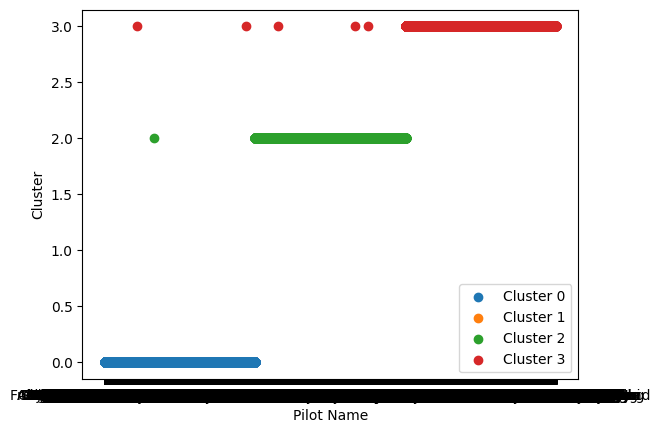

In [38]:
# Seleccionar las columnas relevantes para el análisis
pilots_data = df[['Pilot Name', 'Flight Status']]

# Codificar las etiquetas categóricas (Flight Status) en valores numéricos utilizando one-hot encoding
pilots_data = pd.get_dummies(pilots_data, columns=['Flight Status'])

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pilots_data.drop('Pilot Name', axis=1))

# Aplicar el algoritmo K-means
n_clusters = 4  # Definir el número de clústeres
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
pilots_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Ahora 'pilots_data' contiene una columna 'Cluster' que indica a qué clúster pertenece cada piloto.

# Para explorar los resultados, por ejemplo, viendo los pilotos en cada clúster.
for cluster in range(n_clusters):
    print(f'Cluster {cluster}:')
    print(pilots_data[pilots_data['Cluster'] == cluster])

# También se puede visualizar los resultados, por ejemplo, usando un gráfico de dispersión.

for cluster in range(n_clusters):
    cluster_data = pilots_data[pilots_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Pilot Name'], cluster_data['Cluster'], label=f'Cluster {cluster}')

plt.xlabel('Pilot Name')
plt.ylabel('Cluster')
plt.legend()
plt.show()


El código que se generó espara realizar un análisis de agrupamiento (clustering) en los datos de los pilotos utilizando el algoritmo K-means. Aquí está el desglose de lo que hace cada parte del código:

1. **Selección de datos**: Selecciona las columnas 'Pilot Name' y 'Flight Status' del DataFrame `df` para el análisis.

2. **Codificación one-hot**: Convierte la columna categórica 'Flight Status' en varias columnas binarias. Cada una de estas nuevas columnas representa una categoría única en 'Flight Status', y un valor de 1 indica que la fila original pertenecía a esa categoría.

3. **Escalado de datos**: Escala los datos utilizando `StandardScaler` para asegurar que todas las características tengan la misma importancia en el algoritmo K-means.

4. **Aplicación del algoritmo K-means**: Aplica el algoritmo K-means a los datos escalados para agrupar los pilotos en `n_clusters` grupos basándose en sus estados de vuelo.

5. **Exploración de resultados**: Imprime los pilotos en cada grupo y visualiza los resultados con un gráfico de dispersión.

El gráfico de dispersión muestra cómo se distribuyen los pilotos en cada grupo. Sin embargo, dado que 'Pilot Name' es una variable categórica, no proporciona una visualización significativa en un gráfico de dispersión. Para una visualización más útil, podrías considerar graficar las proporciones de cada estado de vuelo en cada grupo, o utilizar técnicas de reducción de dimensionalidad como PCA para visualizar los grupos en un espacio bidimensional o tridimensional.

Se utiliza PCA para reducir la dimensionalidad de tus datos y visualizar los grupos en un espacio bidimensional o tridimensional. Aquí tienes un ejemplo de cómo podrías hacerlo en Python utilizando la biblioteca sklearn

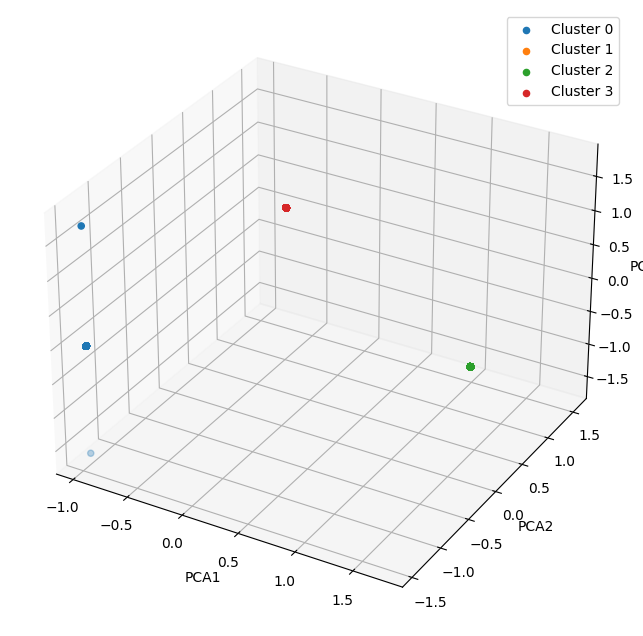

In [ ]:
# Aplicar PCA
pca = PCA(n_components=3)  # Se indica 3 para una visualización tridimensional
pca_data = pca.fit_transform(scaled_data)

# Añadir los resultados de PCA al DataFrame
pilots_data['PCA1'] = pca_data[:, 0]
pilots_data['PCA2'] = pca_data[:, 1]
pilots_data['PCA3'] = pca_data[:, 2]

# Crear un gráfico de dispersión 3D de los resultados de PCA, coloreado por grupo
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(n_clusters):
    cluster_data = pilots_data[pilots_data['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster}')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend()
plt.show()

El gráfico que se generó, es un gráfico de dispersión tridimensional que muestra los resultados de un análisis de agrupamiento (clustering) utilizando el algoritmo K-means y el Análisis de Componentes Principales (PCA) para la reducción de la dimensionalidad.

En el gráfico, cada punto representa un piloto y su color indica a qué grupo pertenece según el algoritmo K-means. Las coordenadas del punto (PCA1, PCA2, PCA3) son las tres primeras componentes principales de los datos del piloto, que son una representación tridimensional que conserva la mayor cantidad de variabilidad posible de los datos originales.

Según el gráfico, parece que los pilotos se han agrupado en tres grupos distintos:

- **Grupo 0** (rojo): Este grupo tiene un solo punto, lo que indica que solo hay un piloto en este grupo o que varios pilotos comparten los mismos valores en las tres primeras componentes principales.

- **Grupo 1** (verde): Este grupo tiene dos puntos, lo que indica que hay dos pilotos en este grupo o que varios pilotos se dividen en dos conjuntos basados en sus valores en las tres primeras componentes principales.

- **Grupo 2** (azul): Este grupo también tiene un solo punto, similar al Grupo 0.

Es importante tener en cuenta que aunque PCA puede ayudar a visualizar los datos en un espacio tridimensional, puede no capturar todas las diferencias entre los grupos si hay mucha variabilidad en las dimensiones que no se muestran en el gráfico.